In [1]:
# import boto3, os

# s3 = boto3.resource('s3')

In [2]:
# for bucket in s3.buckets.all():
#     print(bucket.name)

abs-partners
alb-test0-logs-5165d6e704eae4b
appearheree
appearherepics
appearhererus
appearhereuk
appearhereukfile
appearhereus
appearhereusnew
aws-test-terraform-3578470e089d78df8f45e0e48fe45fa4
bffile
burgerking
burgerkingg
cbre-lease
cbre-sale
chickeria
colliers-rent-images
colliers-sale-images
combineddata
cushman-wakefield
cwfile
eastern-consolidated
elasticbeanstalk-eu-central-1-205808452223
elasticbeanstalk-eu-west-1-205808452223
elasticbeanstalk-eu-west-2-205808452223
elliman
eloc-bucket
eloc-share-f8bf128a9be32a9aefa1b4a56fc9cf3502aaa529665adc13f9d2
elocation-germany-images
elocationjsonbucket
elocations-assets-dev
elocations-ito-map
elocations-ito-map-test
elocations-web
elocations.com
elocnewjson
foodimagess
googleapiimage
holycowfile
images.dev.elocations.com
images.elocations.com
ito-dev-bucket-c0be982abc97810dcaf7b7c72444a
jll-lease-images
jll-sale-images
jllpics
kfcfile
lambda-images-scraper
lambda-images-scraper-staging
mcdonaldd
mcdonalddata
mmfile
photostrial
php-lara

In [7]:
# s3 = boto3.client('s3')
# with open('goodImages', 'wb') as f:
#     s3.download_fileobj('googleapiimage', '0imgData0.jpeg', f)


PermissionError: [Errno 13] Permission denied: 'goodImages'

In [8]:
# s3 = boto3.resource('s3')

# BUCKET_NAME = 'googleapiimage'            # does not include s3://
# KEY = '0imgData0.jpeg'                    # the file you want to download
# s3.Bucket(BUCKET_NAME).download_file(KEY, '0imgData0.jpeg')

In [12]:
# os.chdir('C:\\Users\\91958\\goodImages')
# s3=boto3.client('s3')
# list=s3.list_objects(Bucket='googleapiimage')['Contents']
# for s3_key in list:
#     s3_object = s3_key['Key']
#     if not s3_object.endswith("/"):
#         s3.download_file('googleapiimage', s3_object, s3_object)
#     else:
#         if not os.path.exists(s3_object):
#             os.makedirs(s3_object)

In [13]:
os.chdir('C:\\Users\\91958')

In [77]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from PIL import Image
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import torch
import os
import time
import random
%matplotlib inline

In [78]:
from __future__ import print_function, division

import torch.nn as nn
import torch.optim as optim
import numpy as np
from torch.optim import lr_scheduler
from torchvision import datasets, models, transforms

In [79]:
train_Aug = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),    
                                            torchvision.transforms.RandomRotation((-20, 20)),  
                                            torchvision.transforms.RandomAffine(0, translate=None, scale=[0.7, 1.3], shear=None, resample=False, fillcolor=0), 
                                            torchvision.transforms.ToTensor()])
test_Aug = torchvision.transforms.Compose([torchvision.transforms.Resize((224, 224)),  
                                           torchvision.transforms.ToTensor()])

In [80]:
base_dir = "C:\\Users\\91958\\eloc_sample_data"
os.listdir(base_dir)

['test', 'train']

In [81]:
train_dir = "C:\\Users\\91958\\eloc_sample_data\\train"
os.listdir(train_dir)

['bad', 'good']

In [92]:
trainset = torchvision.datasets.ImageFolder(train_dir,transform = train_Aug)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=10, shuffle=True, num_workers=2)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [93]:
class_names = trainset.classes
len(class_names)

2

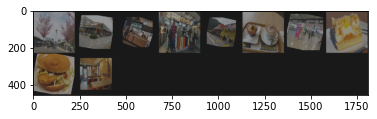

In [94]:
def imshow(img):
    img = img / 2 + 0.1    # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))

In [95]:
my_resnet_model = models.resnet50(pretrained=True)

num_features = my_resnet_model.fc.in_features
my_resnet_model.fc = nn.Linear(num_features, 2)

In [96]:
my_resnet_model = my_resnet_model.to(device)
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(my_resnet_model.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [97]:
num_epochs = 10
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, data in enumerate(trainloader, 0): 
        exp_lr_scheduler.step()
        my_resnet_model.train()  # Set model to training mode
        
        for inputs, labels in trainloader:
                inputs = inputs.to(device) 
                labels = labels.to(device)
                
                optimizer_ft.zero_grad()
                outputs = my_resnet_model(inputs)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer_ft.step()
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # correct += (outputs == labels).float().sum()
        print("Epoch {}/{}, Loss: {:.3f}, Accuracy: {:.3f}".format(epoch+1,num_epochs, loss.item(), correct/total))

print('Finished Training')

Epoch 1/10, Loss: 0.497, Accuracy: 0.675
Epoch 1/10, Loss: 0.276, Accuracy: 0.740
Epoch 1/10, Loss: 0.455, Accuracy: 0.782
Epoch 1/10, Loss: 0.248, Accuracy: 0.816
Epoch 1/10, Loss: 0.384, Accuracy: 0.838
Epoch 1/10, Loss: 0.073, Accuracy: 0.854
Epoch 1/10, Loss: 0.006, Accuracy: 0.870
Epoch 1/10, Loss: 0.056, Accuracy: 0.886
Epoch 1/10, Loss: 0.050, Accuracy: 0.896
Epoch 1/10, Loss: 0.185, Accuracy: 0.902
Epoch 1/10, Loss: 0.255, Accuracy: 0.909
Epoch 1/10, Loss: 0.016, Accuracy: 0.915
Epoch 1/10, Loss: 0.058, Accuracy: 0.919
Epoch 1/10, Loss: 0.049, Accuracy: 0.924
Epoch 1/10, Loss: 0.125, Accuracy: 0.927
Epoch 1/10, Loss: 0.028, Accuracy: 0.931
Epoch 1/10, Loss: 0.022, Accuracy: 0.933
Epoch 1/10, Loss: 0.016, Accuracy: 0.936
Epoch 1/10, Loss: 0.090, Accuracy: 0.938
Epoch 1/10, Loss: 0.007, Accuracy: 0.940
Epoch 2/10, Loss: 0.006, Accuracy: 0.960
Epoch 2/10, Loss: 0.035, Accuracy: 0.953
Epoch 2/10, Loss: 0.008, Accuracy: 0.963
Epoch 2/10, Loss: 0.216, Accuracy: 0.969
Epoch 2/10, Loss

In [104]:
test_dir = "C:\\Users\\91958\\eloc_sample_data\\test"
testset = torchvision.datasets.ImageFolder(train_dir,transform = test_Aug)

testloader = torch.utils.data.DataLoader(testset, batch_size=10, shuffle=True, num_workers=2)

In [105]:
dataiter = iter(testloader)
images, labels = dataiter.next()

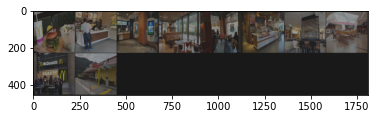

In [106]:
imshow(torchvision.utils.make_grid(images))

In [107]:
my_resnet_model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [108]:
num_epochs = 10
for epoch in range(num_epochs):
    correct = 0
    total = 0
    for i, data in enumerate(testloader, 0): 
        exp_lr_scheduler.step()
        my_resnet_model.eval() 
        
        for inputs, labels in testloader:
                inputs = inputs.to(device) 
                labels = labels.to(device)
                
                optimizer_ft.zero_grad()
                outputs = my_resnet_model(inputs)
                
                _, predicted = torch.max(outputs.data, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        # correct += (outputs == labels).float().sum()
        print("Epoch {}/{}, Accuracy: {:.3f}".format(epoch+1,num_epochs, correct/total))

print('Finished Testing')

Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 1/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy: 0.995
Epoch 2/10, Accuracy